In [3]:
from sklearn import datasets, linear_model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
df1 = df.drop(columns=['date','waterfront','view'],axis=1)
df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df1.dropna()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1225000.0,4,4.50,5420,101930,1.0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [16]:
np.array(df1)

array([[ 7.12930052e+09,  2.21900000e+05,  3.00000000e+00, ...,
        -1.22257000e+02,  1.34000000e+03,  5.65000000e+03],
       [ 6.41410019e+09,  5.38000000e+05,  3.00000000e+00, ...,
        -1.22319000e+02,  1.69000000e+03,  7.63900000e+03],
       [ 5.63150040e+09,  1.80000000e+05,  2.00000000e+00, ...,
        -1.22233000e+02,  2.72000000e+03,  8.06200000e+03],
       ...,
       [ 1.52330014e+09,  4.02101000e+05,  2.00000000e+00, ...,
        -1.22299000e+02,  1.02000000e+03,  2.00700000e+03],
       [ 2.91310100e+08,  4.00000000e+05,  3.00000000e+00, ...,
        -1.22069000e+02,  1.41000000e+03,  1.28700000e+03],
       [ 1.52330016e+09,  3.25000000e+05,  2.00000000e+00, ...,
        -1.22299000e+02,  1.02000000e+03,  1.35700000e+03]])

In [17]:
df2 = (df1-df1.min())/(df1.max()-df1.min())
df2 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.50,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.50,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.50,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,1.00,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.50,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871
5,0.731039,0.150820,0.121212,0.56250,0.387170,0.061429,0.0,0.50,0.833333,0.394737,0.317427,0.878261,0.000000,0.262626,0.804568,0.426910,0.750473,0.116339
6,0.133387,0.023934,0.090909,0.28125,0.107547,0.003816,0.4,0.50,0.500000,0.156250,0.000000,0.826087,0.000000,0.010101,0.247386,0.159468,0.316469,0.007085
7,0.202748,0.028439,0.090909,0.18750,0.058113,0.005567,0.0,0.50,0.500000,0.084430,0.000000,0.547826,0.000000,0.994949,0.407914,0.169435,0.215281,0.010407
8,0.243823,0.020262,0.090909,0.12500,0.112453,0.004210,0.0,0.50,0.500000,0.083333,0.151452,0.521739,0.000000,0.732323,0.573267,0.151163,0.237653,0.008572
9,0.383120,0.032525,0.090909,0.31250,0.120755,0.003659,0.4,0.50,0.500000,0.175439,0.000000,0.895652,0.000000,0.186869,0.341805,0.405316,0.342626,0.007948


In [18]:
df2.shape

(21613, 18)

In [19]:
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.462602,0.060995,0.102147,0.264345,0.135087,0.008836,0.197724,0.602357,0.554739,0.164297,0.060479,0.617436,0.041887,0.388585,0.650076,0.253408,0.273198,0.013919
std,0.290592,0.048148,0.028184,0.096270,0.069316,0.025091,0.215996,0.162686,0.097955,0.090799,0.091821,0.255421,0.199345,0.270227,0.222879,0.116967,0.117947,0.031364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214370,0.032387,0.090909,0.218750,0.085811,0.002738,0.000000,0.500000,0.500000,0.098684,0.000000,0.443478,0.000000,0.161616,0.506836,0.158638,0.187747,0.005111
50%,0.394376,0.049180,0.090909,0.281250,0.122264,0.004300,0.200000,0.500000,0.500000,0.139254,0.000000,0.652174,0.000000,0.323232,0.668972,0.240033,0.247978,0.008005
75%,0.738246,0.074754,0.121212,0.312500,0.170566,0.006159,0.400000,0.750000,0.583333,0.210526,0.116183,0.843478,0.000000,0.590909,0.839794,0.327243,0.337463,0.010835
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df2.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


In [24]:
df3 =df2.iloc[:, :5]
df3.head()

,id,price,bedrooms,bathrooms,sqft_living
0,0.720103,0.019266,0.090909,0.12500,0.067170
1,0.647853,0.060721,0.090909,0.28125,0.172075
2,0.568795,0.013770,0.060606,0.12500,0.036226
3,0.251157,0.069377,0.121212,0.37500,0.126038
4,0.197333,0.057049,0.090909,0.25000,0.104906


In [25]:
df4 = df3.drop(columns=['id','bedrooms','bathrooms'],axis=1)
df4

,price,sqft_living
0,0.019266,0.067170
1,0.060721,0.172075
2,0.013770,0.036226
3,0.069377,0.126038
4,0.057049,0.104906
5,0.150820,0.387170
6,0.023934,0.107547
7,0.028439,0.058113
8,0.020262,0.112453
9,0.032525,0.120755


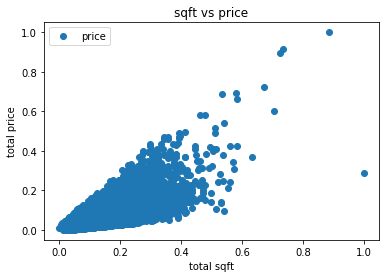

In [26]:
df4.plot(x='sqft_living', y='price', style='o')
plt.title('sqft vs price')
plt.xlabel('total sqft')
plt.ylabel('total price')
plt.show()

In [30]:
x= df4.iloc[:, :-1].values
x
y= df4.iloc[:, 1].values
y

array([0.06716981, 0.17207547, 0.03622642, ..., 0.05509434, 0.09886792,
       0.05509434])

In [36]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x , y)
from sklearn.model_selection import train_test_split

In [37]:
print(regressor.intercept_)

0.07343964538342443


In [38]:
print(regressor.coef_)

[1.01068873]


In [44]:
df5 = pd.DataFrame({'Actual':list(x),'Predicted':list(y)})
df5.head()

,Actual,Predicted
0,[0.019265573770491803],0.092911
1,[0.06072131147540984],0.134810
2,[0.01377049180327869],0.087357
3,[0.06937704918032787],0.143558
4,[0.057049180327868855],0.131099
